<a href="https://colab.research.google.com/github/zahra-teb/graph_ml_course_assignments/blob/main/assignment_8/assignment_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install dgl -f https://data.dgl.ai/wheels/repo.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.dgl.ai/wheels/repo.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 52.4 MB/s eta 0:00:00


In [2]:
!pip install dglgo -f https://data.dgl.ai/wheels-test/repo.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.dgl.ai/wheels-test/repo.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.5/63.5 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.4/52.4 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 49.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 94.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.6/485.6 kB 39.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... don

In [3]:
%matplotlib inline
import os

os.environ["DGLBACKEND"] = "pytorch"
import dgl
import numpy as np
import networkx as nx
import torch
import torch.nn as nn
import dgl.function as fn
import torch.nn.functional as F

In [4]:
g = dgl.graph((torch.tensor([0, 2, 2, 2, 3, 3]), torch.tensor([1, 1, 0, 3, 4, 5])))
g

Graph(num_nodes=6, num_edges=6,
      ndata_schemes={}
      edata_schemes={})

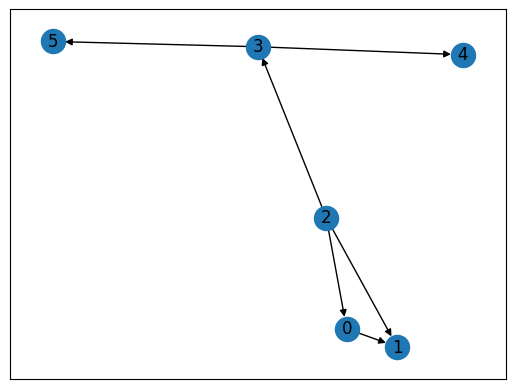

In [5]:
nx.draw_networkx(g.to_networkx(), with_labels = True)

In [6]:
g.ndata['x'] = torch.randn(g.num_nodes(), 1)
g.ndata['x']

tensor([[ 0.2005],
        [-0.6094],
        [ 1.2969],
        [-1.3801],
        [ 0.5967],
        [-1.2820]])

In [7]:
g.edata['w'] = torch.ones(g.num_edges(), 2)
g.edata['w']

tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]])

In [8]:
g.apply_nodes(lambda nodes: {'y' : 5 * nodes.data['x']})
g.ndata['y']

tensor([[ 1.0027],
        [-3.0469],
        [ 6.4843],
        [-6.9007],
        [ 2.9833],
        [-6.4099]])

In [9]:
g.apply_nodes(lambda nodes: {'z' : 2 * nodes.data['y']})
g.ndata['z']

tensor([[  2.0055],
        [ -6.0937],
        [ 12.9685],
        [-13.8015],
        [  5.9665],
        [-12.8198]])

In [10]:
g.apply_edges(lambda edges: {'p' : edges.data['w'] * 2})
g.edata['p']

tensor([[2., 2.],
        [2., 2.],
        [2., 2.],
        [2., 2.],
        [2., 2.],
        [2., 2.]])

In [11]:
g.apply_edges(lambda edges: {'q' : edges.src['y'] * 3})
g.edata['q']

tensor([[  3.0082],
        [ 19.4528],
        [ 19.4528],
        [ 19.4528],
        [-20.7022],
        [-20.7022]])

In [12]:
def func_1(edges):
  return {'s': torch.round(edges.dst['z'])}

g.apply_edges(func_1)
g.edata['s']

tensor([[ -6.],
        [ -6.],
        [  2.],
        [-14.],
        [  6.],
        [-13.]])

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
g.send_and_recv([0, 1, 2, 3], fn.copy_u('y', 'mailbox'), fn.sum('mailbox', 'total'))
g.ndata['total']

tensor([[6.4843],
        [7.4870],
        [0.0000],
        [6.4843],
        [0.0000],
        [0.0000]])

In [16]:
def message_func(edges):
    return {'mailbox' : 3*edges.src['z']}

g.send_and_recv([0, 1, 2], message_func, fn.sum('mailbox', 'total_2'))
g.ndata['total_2']


tensor([[38.9056],
        [44.9221],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000]])

In [17]:
def message_func_2(nodes):
    return {'mailbox' : 5 * nodes.data['y']}

g.pull(1, message_func, fn.max('mailbox', 'max'))
g.ndata['max']

tensor([[ 0.0000],
        [38.9056],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000]])

In [20]:
g.pull(1, fn.copy_u('y', 'mailbox'), fn.max('mailbox', 'max_2'))
g.ndata['max_2']

tensor([[0.0000],
        [6.4843],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000]])

In [21]:
g.push([0, 5], fn.copy_u('y', 'mailbox'), fn.mean('mailbox', 'mean'))
g.ndata['mean']

tensor([[0.0000],
        [1.0027],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000]])

In [22]:
def message_func_3(edges):
    return {'mailbox' : 4 * edges.src['y']}

def reduce_func(nodes):
    sum = torch.sum(nodes.mailbox['mailbox'], dim=1)
    return {'sum' : sum}

g.update_all(message_func_3, reduce_func)
g.ndata['sum']

tensor([[ 25.9371],
        [ 29.9480],
        [  0.0000],
        [ 25.9371],
        [-27.6030],
        [-27.6030]])

In [23]:
g.ndata['a'] = torch.ones(g.num_nodes(), 3)
g.ndata['a']

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

**We use feature 'a' for nodes and feature 'p' for edges from now on.**
**Also we use 'sum' as reduce function.**

In [24]:
g.update_all(fn.copy_u('a', 'mailbox'), fn.sum('mailbox', 'a_sum'))
g.ndata['a_sum']

tensor([[1., 1., 1.],
        [2., 2., 2.],
        [0., 0., 0.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [25]:
g.update_all(fn.copy_e('p', 'mailbox'), fn.sum('mailbox', 'p_sum'))
g.ndata['p_sum']

tensor([[2., 2.],
        [4., 4.],
        [0., 0.],
        [2., 2.],
        [2., 2.],
        [2., 2.]])

In [28]:
# compute edge embedding by adding source and destination node embeddings
g.apply_edges(fn.u_add_v('a_sum', 'a_sum', 'p_add'))
g.edata['p_add']

tensor([[3., 3., 3.],
        [2., 2., 2.],
        [1., 1., 1.],
        [1., 1., 1.],
        [2., 2., 2.],
        [2., 2., 2.]])

In [30]:
# compute edge embedding by multiplying source and destination node embeddings
g.apply_edges(fn.u_mul_v('a_sum', 'a_sum', 'p_mul'))
g.edata['p_mul']

tensor([[2., 2., 2.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [31]:
# Add destination node features to edge weights and aggregate them in destination nodes
g.update_all(fn.v_add_e('a', 'p_mul', 'mailbox'), fn.sum('mailbox', 'a_sum_2'))
g.ndata['a_sum_2']

tensor([[1., 1., 1.],
        [4., 4., 4.],
        [0., 0., 0.],
        [1., 1., 1.],
        [2., 2., 2.],
        [2., 2., 2.]])

In [35]:
# multiply destination node features with edge weights and aggregate them in destination nodes
g.update_all(fn.v_mul_e('a', 'p_mul', 'mailbox'), fn.sum('mailbox', 'a_mul'))
g.ndata['a_mul']

tensor([[0., 0., 0.],
        [2., 2., 2.],
        [0., 0., 0.],
        [0., 0., 0.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [36]:
# compute edge embedding by adding destination and source node embeddings
g.apply_edges(fn.v_add_u('a_sum', 'a_sum', 'p_add_2'))
g.edata['p_add_2']

tensor([[3., 3., 3.],
        [2., 2., 2.],
        [1., 1., 1.],
        [1., 1., 1.],
        [2., 2., 2.],
        [2., 2., 2.]])

**The output is obviously same as u_add_v**

In [37]:
# compute edge embedding by multiplying destination and source node embeddings
g.apply_edges(fn.u_mul_v('a_sum', 'a_sum', 'p_mul_2'))
g.edata['p_mul_2']

tensor([[2., 2., 2.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [1., 1., 1.],
        [1., 1., 1.]])

**Same as u_mul_v :)**

In [38]:
# Add source node features to edge weights and aggregate them in destination nodes
g.update_all(fn.u_add_e('a', 'p_mul', 'mailbox'), fn.sum('mailbox', 'a_sum_3'))
g.ndata['a_sum_3']

tensor([[1., 1., 1.],
        [4., 4., 4.],
        [0., 0., 0.],
        [1., 1., 1.],
        [2., 2., 2.],
        [2., 2., 2.]])

**Same as v_add_e**

In [39]:
# multiply source node features with edge weights and aggregate them in destination nodes
g.update_all(fn.u_mul_e('a', 'p_mul', 'mailbox'), fn.sum('mailbox', 'a_mul_2'))
g.ndata['a_mul_2']

tensor([[0., 0., 0.],
        [2., 2., 2.],
        [0., 0., 0.],
        [0., 0., 0.],
        [1., 1., 1.],
        [1., 1., 1.]])

**Same as v_mul_e**